In [552]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #not good enough
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import f1_score,recall_score,precision_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
import random
import time
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

In [553]:
df = pd.read_csv("/Users/ronnieasatourian/Desktop/Spring 2022 UCI/Stats 170B/DataSets/usable_cases.csv")
df.head()

,id,zip,posted_date,age,gender,race,ethnicity,death_date,death_due_to_covid,age_group,...,population,name,area_km,pop_density,adj_pop_density,adj_med_income,adj_perc_bach,adj_perc_bach_quar,adj_perc_insured,adj_perc_insured_quar
0,1,90620,2020-07-02,29,female,unknown,Unknown,2020-01-22,0,25-29,...,45.113,Buena Park,17.051480,2.645694,0.255812,-0.196087,-0.814268,Q1,-0.181881,Q2
1,100,92692,2020-09-15,22,female,unknown,Unknown,2020-01-22,0,20-24,...,47.222,Mission Viejo,25.398158,1.859269,-0.332470,0.658089,0.387136,Q3,0.931549,Q4
2,1000,92805,2020-06-30,50,male,unknown,Unknown,2020-01-22,0,50-59,...,70.401,Anaheim,16.951050,4.153194,1.383490,-0.994791,-1.524957,Q1,-1.921616,Q1
3,1000079,92802,2020-12-23,12,female,hispanic,Hispanic or Latino,2020-01-22,0,10-14,...,42.709,Anaheim,11.597180,3.682706,1.031543,-1.150236,-1.417790,Q1,-1.921616,Q1
4,1000087,92802,2020-12-23,13,female,hispanic,Hispanic or Latino,2020-01-22,0,10-14,...,42.709,Anaheim,11.597180,3.682706,1.031543,-1.150236,-1.417790,Q1,-1.921616,Q1


In [3]:
df.describe()

,id,zip,age,death_due_to_covid,decades_old,time_days,adj_time_days,percent_insured,percent_bachelors,med_income,population,area_km,pop_density,adj_pop_density,adj_med_income,adj_perc_bach,adj_perc_insured
count,2.112510e+05,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000,211251.000000
mean,8.941962e+05,92539.485214,39.924024,0.012644,3.992402,292.137405,0.003832,79.108070,32.371667,7.920678,50.674344,21.841682,3.144879,0.629224,-0.486714,-0.686137,-0.679669
std,6.564495e+05,627.152945,19.492640,0.111731,1.949264,74.629494,0.996959,9.639283,16.303528,2.273889,20.101989,30.361260,1.464072,1.095192,0.744605,0.919583,1.117986
min,1.000000e+00,90620.000000,0.000000,0.000000,0.000000,0.000000,-3.898767,56.600000,8.600000,3.913500,0.456000,0.201580,0.012657,-1.713819,-1.798898,-2.026952,-3.290207
25%,7.140550e+04,92653.000000,25.000000,0.000000,2.500000,265.000000,-0.358691,71.700000,19.400000,6.161100,35.533000,11.936135,2.002588,-0.225261,-1.062902,-1.417790,-1.538874
50%,1.176606e+06,92704.000000,38.000000,0.000000,3.800000,325.000000,0.442836,79.500000,30.100000,7.177600,49.341000,17.047489,2.996877,0.518512,-0.730041,-0.814268,-0.634212
75%,1.499470e+06,92805.000000,54.000000,0.000000,5.400000,343.000000,0.683294,87.100000,43.000000,9.255200,62.068000,23.565152,4.153194,1.383490,-0.049713,-0.086657,0.247253
max,1.750539e+06,92887.000000,121.000000,1.000000,12.100000,369.000000,1.030622,96.700000,87.800000,20.468800,89.747000,286.367977,6.439848,3.094010,3.622277,2.440239,1.360683


<AxesSubplot:>

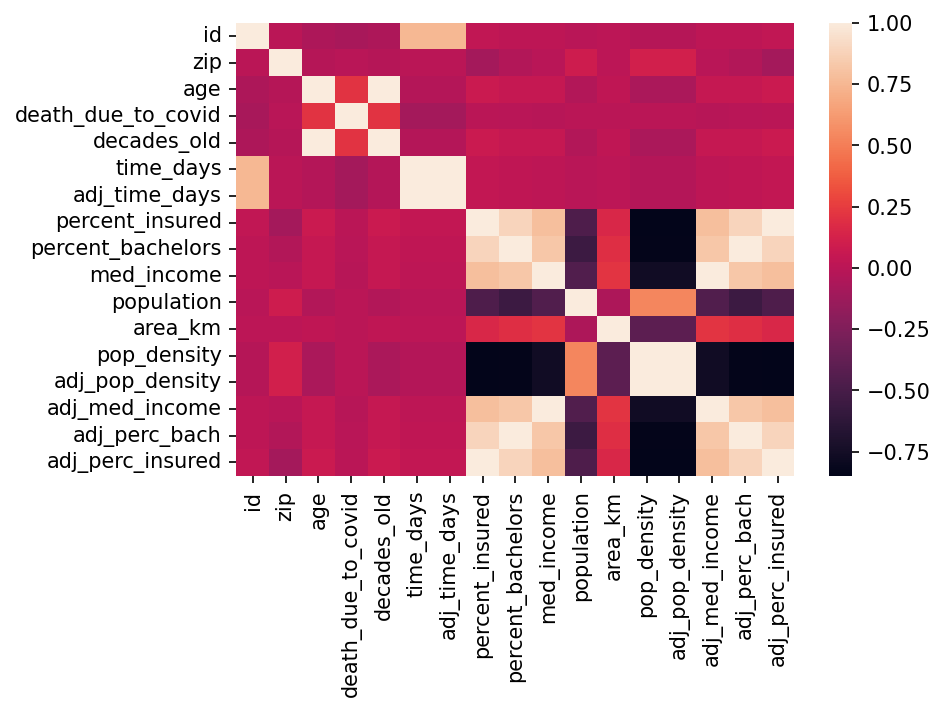

In [5]:
plt.figure(dpi=150)
sns.heatmap(df.corr())

**This dataset is not balanced since mortality count is less than survival count**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211251 entries, 0 to 211250
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     211251 non-null  int64  
 1   zip                    211251 non-null  int64  
 2   posted_date            211251 non-null  object 
 3   age                    211251 non-null  int64  
 4   gender                 211251 non-null  object 
 5   race                   211251 non-null  object 
 6   ethnicity              211251 non-null  object 
 7   death_date             211251 non-null  object 
 8   death_due_to_covid     211251 non-null  int64  
 9   age_group              211251 non-null  object 
 10  decades_old            211251 non-null  float64
 11  time_days              211251 non-null  int64  
 12  adj_time_days          211251 non-null  float64
 13  covid_death            211251 non-null  object 
 14  percent_insured        211251 non-nu

In [13]:
df["death_due_to_covid"].value_counts()

0    208580
1      2671
Name: death_due_to_covid, dtype: int64

<AxesSubplot:xlabel='death_due_to_covid', ylabel='count'>

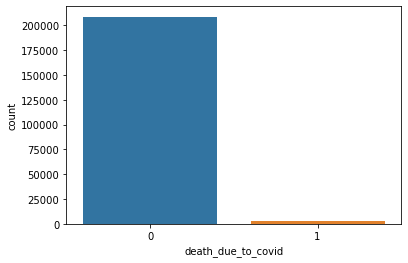

In [10]:
sns.countplot(data=df,x='death_due_to_covid')

**NOW We have to deal with unbalanced data**

In [554]:
classifier_names = ['XGBClassifier','LogisticRegression','RandomForestClassifier']
classifiers = [XGBClassifier(),LogisticRegression(),RandomForestClassifier()]

resample_coeffs = [0.013 , 0.2, 0.4, 0.6, 0.8, 1]

results = {}
for clf in classifier_names:
    results[clf] = {'running_times':[],'resample_coeffs':[] ,'accuracies': [],'f1_scores': [],'precisions':[],'recalls':[],'confusion_matrices':[]}
running_times = []
accuracies = []
f1_scores = []
precisions = []
recalls = []
confusion_matrices = []

df_0 = df.copy()
for coeff in resample_coeffs:
    df = df_0.copy()
    for i,clf in enumerate(classifiers):
        classifier_name = classifier_names[i]
        count_class_0,count_class_1 = df["death_due_to_covid"].value_counts()

        df_class_0 = df[df["death_due_to_covid"] == 0]
        df_class_1 = df[df["death_due_to_covid"] == 1]

        # [0.013 , 0.2, 0.4, 0.6, 0.8, 1]
        resample_coeff = coeff
        df_class_0_undersample = df_class_0.sample(int(count_class_0 * resample_coeff))
        df_under = pd.concat([df_class_0_undersample,df_class_1],axis = 0)
        df = df_under

        X = df.drop('death_due_to_covid',axis = 1)
        y = df['death_due_to_covid']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



        X_train_num = X_train.select_dtypes(exclude=[np.object])
        X_train_cat = X_train.select_dtypes(include=[np.object])

        X_test_num = X_test.select_dtypes(exclude=[np.object])
        X_test_cat = X_test.select_dtypes(include=[np.object])


        scaler = StandardScaler()
        scaled_X_train_num = scaler.fit_transform(X_train_num)
        scaled_X_test_num = scaler.transform(X_test_num)

        scaled_X_train_num_df = pd.DataFrame(data = scaled_X_train_num,columns=X_train_num.columns)
        scaled_X_test_num_df = pd.DataFrame(data = scaled_X_test_num,columns=X_test_num.columns)

        full_X_train = pd.concat([scaled_X_train_num_df.reset_index(),X_train_cat.reset_index()],axis = 1)
        full_X_test = pd.concat([scaled_X_test_num_df.reset_index(),X_test_cat.reset_index()],axis = 1)

        full_X_train = full_X_train.drop('index',1)
        full_X_test = full_X_test.drop('index',1)

        column_name = list(full_X_train.columns)
        random.shuffle(column_name)

        full_X_train = full_X_train.reindex(column_name,axis = 1)
        full_X_test = full_X_test.reindex(column_name,axis = 1)



        categorical_indexes = []
        categorical_column = []
        for i,c in enumerate(full_X_train.columns):
            if(full_X_train.dtypes[c] == object):
                categorical_indexes.append(i)
                categorical_column.append(c)

        oversample = SMOTENC(categorical_features = categorical_indexes ,sampling_strategy='minority', random_state=42) 

        balanced_train_X, balanced_train_y = oversample.fit_resample(full_X_train, y_train) 

        le = LabelEncoder()
        for column_name in categorical_column:
            le.fit(df[column_name])
            balanced_train_X[column_name] = le.transform(balanced_train_X[column_name])

            full_X_test[column_name] = le.transform(full_X_test[column_name])


        balanced_train_X.drop('covid_death',1,inplace=True)
        full_X_test.drop("covid_death",1,inplace=True)


        
        classifier = clone(clf)
        start = time.time() # Timming classifier fitting and prediction
        clf.fit(balanced_train_X, balanced_train_y)
        y_pred_xgb = clf.predict(full_X_test)
        end = time.time()
        # print("XGBOOST")
        # print(classification_report(y_test,y_pred_xgb))
        
        results[classifier_name]['running_times'].append(end - start)
        results[classifier_name]['resample_coeffs'].append(coeff)
        results[classifier_name]['accuracies'].append(accuracy_score(y_test,y_pred_xgb))
        results[classifier_name]['f1_scores'].append(f1_score(y_test,y_pred_xgb)) 
        results[classifier_name]['precisions'].append(precision_score(y_test,y_pred_xgb))
        results[classifier_name]['recalls'].append(recall_score(y_test,y_pred_xgb))
        results[classifier_name]['confusion_matrices'].append(confusion_matrix(y_test,y_pred_xgb))


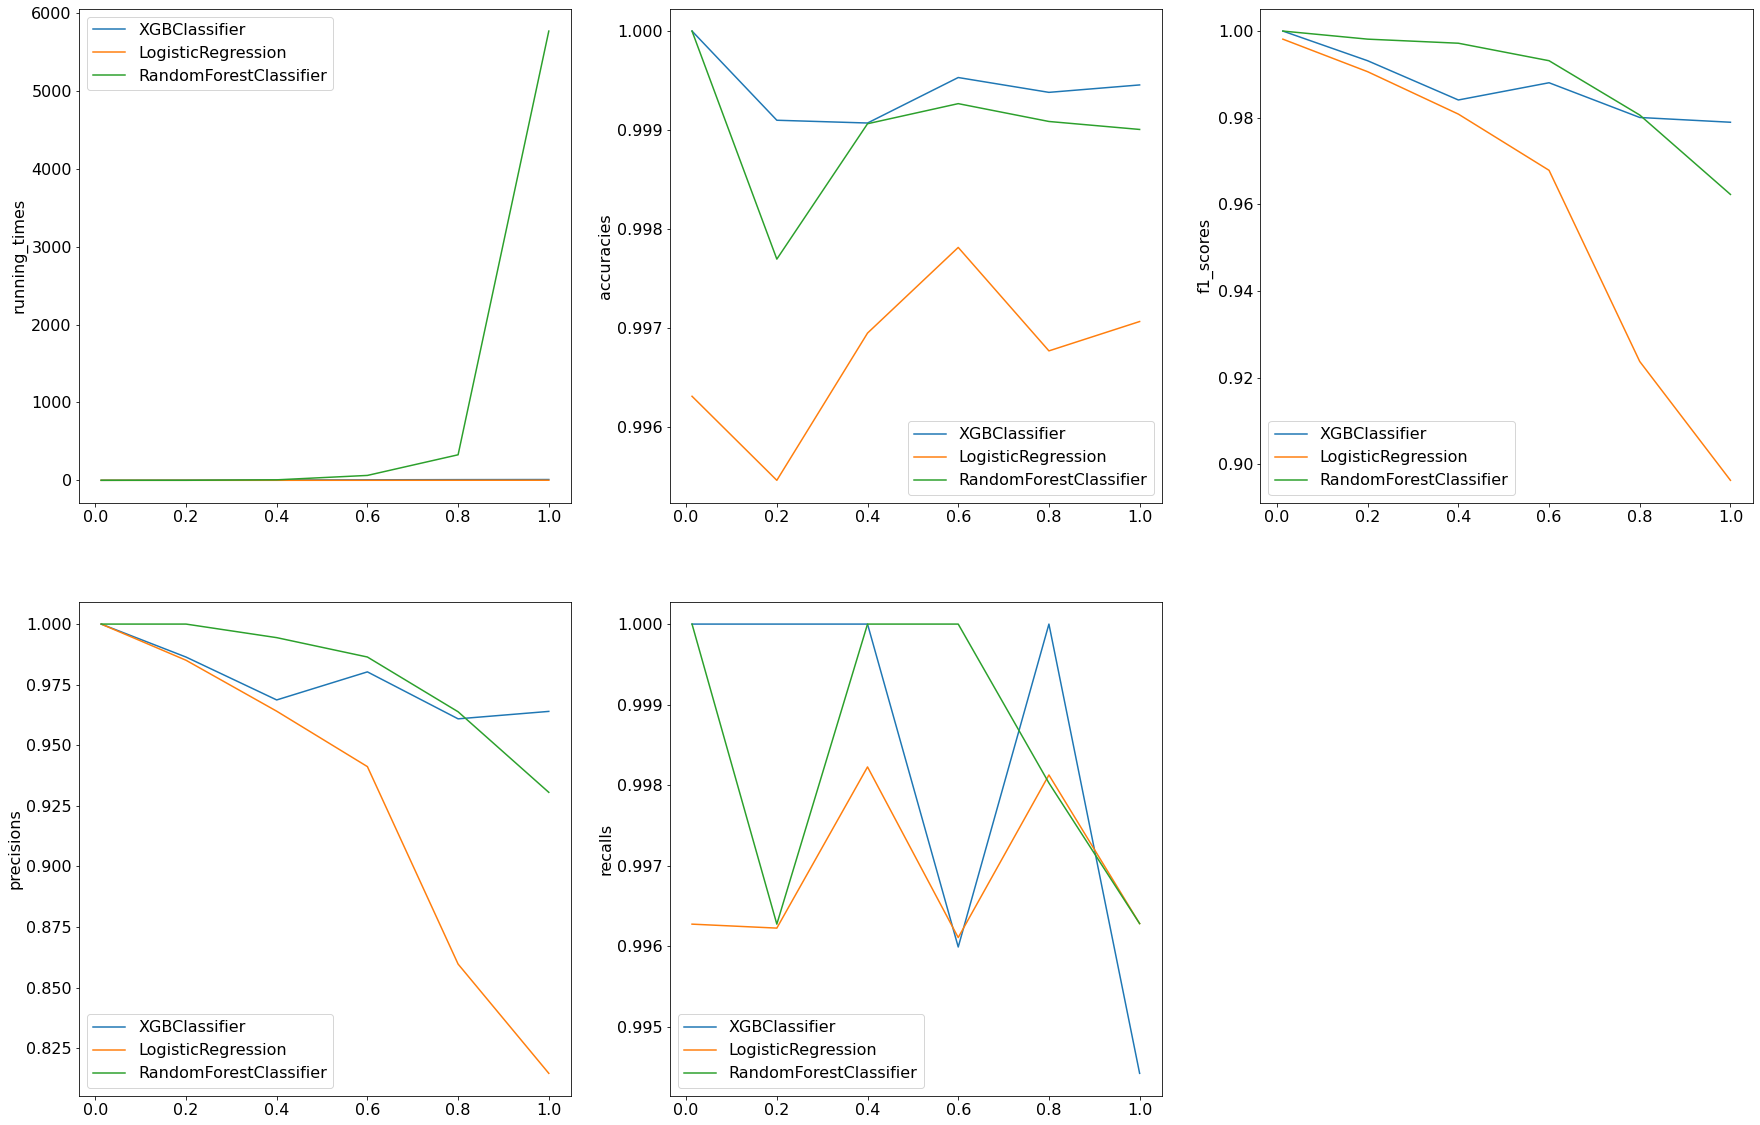

In [555]:
i = 1
plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 16})
for item in results[classifier_names[0]]:
    if item not in ['resample_coeffs','confusion_matrices']:
        plt.subplot(2, 3,i)
        i += 1
        for clf in results:
              plt.plot(results[clf]['resample_coeffs'],results[clf][item],label = clf)
              plt.ylabel(item)
        plt.legend()
        

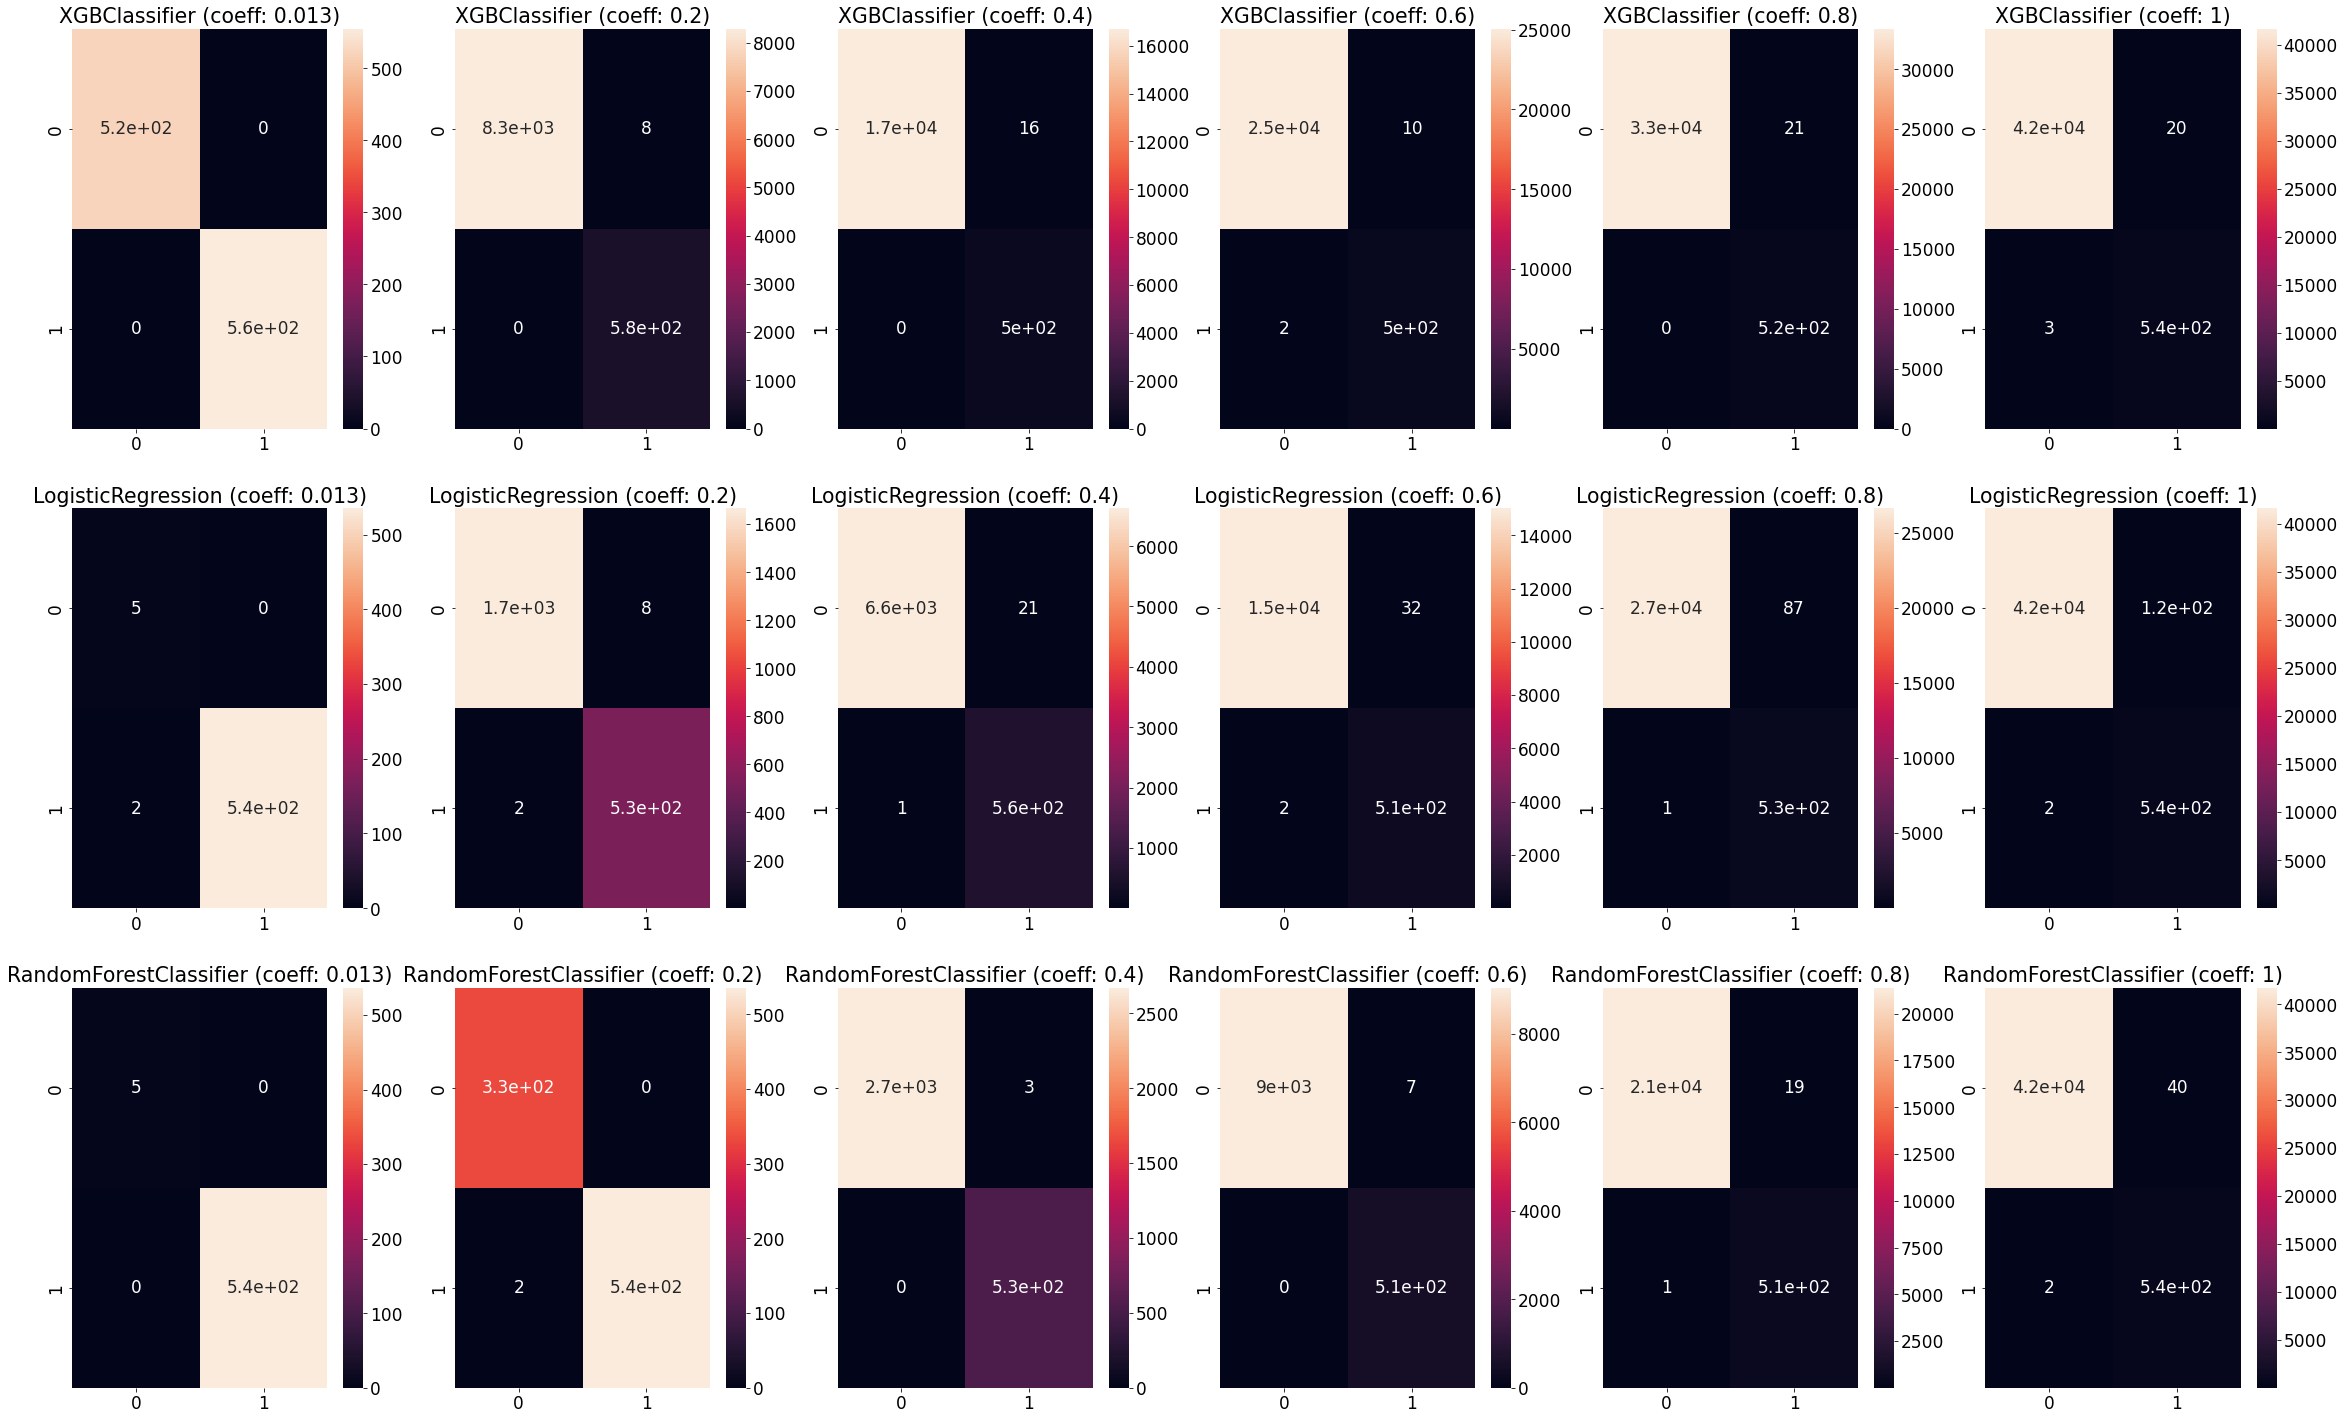

In [556]:
k = 1
plt.figure(figsize=(40,25))
plt.rcParams.update({'font.size': 17})
for clf in results:
    for i in range(6):
        plt.subplot(3,6,k)
        k += 1
        sns.heatmap(results[clf]['confusion_matrices'][i] ,annot = True)
        plt.title('{} (coeff: {})'.format(clf,results[clf]['resample_coeffs'][i]))